In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import xlrd
import matplotlib.pyplot as plt

## Importing and Data Cleaning

In [41]:
city = pd.read_csv('./DataSets/City.csv')
print(city.info(), '\n\n')
city.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None 




,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [42]:
city['Population'] = city['Population'].apply(lambda x: x.replace(',', ''))
city['Users'] = city['Users'].str.replace(',', '')
city = city.astype({'City': 'string', 'Population': 'uint32', 'Users': 'uint32'})

In [43]:
print(city.info(), '\n\n')
city.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     string
 1   Population  20 non-null     uint32
 2   Users       20 non-null     uint32
dtypes: string(1), uint32(2)
memory usage: 448.0 bytes
None 




,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [44]:
for idx, val in city['City'].str.split(' ').iteritems():
    if len(val[-1])==2:
        city.loc[idx, 'State'] = val[-1]
        city.loc[idx, 'City'] = ' '.join(val[:-1])
    else:
        city.loc[idx, 'State'] = np.nan
        city.loc[idx, 'City'] = ' '.join(val)
city.head()

,City,Population,Users,State
0,NEW YORK,8405837,302149,NY
1,CHICAGO,1955130,164468,IL
2,LOS ANGELES,1595037,144132,CA
3,MIAMI,1339155,17675,FL
4,SILICON VALLEY,1177609,27247,NaN


In [45]:
city_cols = city.columns.tolist()
city_cols = [city_cols[0]] + [city_cols[-1]] + city_cols[1:-1]
city = city[city_cols]
city.head()

,City,State,Population,Users
0,NEW YORK,NY,8405837,302149
1,CHICAGO,IL,1955130,164468
2,LOS ANGELES,CA,1595037,144132
3,MIAMI,FL,1339155,17675
4,SILICON VALLEY,NaN,1177609,27247


In [46]:
city['City'] = city['City'].apply(lambda x: ' '.join(list(map(str.capitalize, list(map(str.lower, x.split(' ')))))))

In [47]:
city.loc[city['State'].isna(), 'State'] = 'CA'

In [48]:
city.head()

,City,State,Population,Users
0,New York,NY,8405837,302149
1,Chicago,IL,1955130,164468
2,Los Angeles,CA,1595037,144132
3,Miami,FL,1339155,17675
4,Silicon Valley,CA,1177609,27247


### Importing and type conversion of Cab data

In [49]:
cab = pd.read_csv('./DataSets/Cab_Data.csv')
print(cab.info(), '\n\n')
cab.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None 




,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [50]:
print(np.iinfo(np.uint64))
print(np.iinfo(np.uint32))
print(np.iinfo(np.uint16))
print(np.iinfo(np.uint8))

print(np.finfo(np.float64))
print(np.finfo(np.float32))
print(np.finfo(np.float16))

Machine parameters for uint64
---------------------------------------------------------------
min = 0
max = 18446744073709551615
---------------------------------------------------------------

Machine parameters for uint32
---------------------------------------------------------------
min = 0
max = 4294967295
---------------------------------------------------------------

Machine parameters for uint16
---------------------------------------------------------------
min = 0
max = 65535
---------------------------------------------------------------

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  

In [51]:
print(min(cab['Transaction ID']), max(cab['Transaction ID']))
print(min(cab['KM Travelled']), max(cab['KM Travelled']))
print(min(cab['Price Charged']), max(cab['Price Charged']))
print(min(cab['Cost of Trip']), max(cab['Cost of Trip']))

10000011 10440107
1.9 48.0
15.6 2048.03
19.0 691.2


In [52]:
cab = cab.astype({'Transaction ID': 'uint32', 'Company': 'string', 'City': 'string'})

In [53]:
print(cab.info(), '\n\n')
cab.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  uint32 
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  string 
 3   City            359392 non-null  string 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), string(2), uint32(1)
memory usage: 17.8 MB
None 




,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [54]:
cab['Date of Travel'] = cab['Date of Travel'].apply(lambda x: xlrd.xldate_as_datetime(x, 0).date())

In [55]:
cab['Date of Travel'] = pd.to_datetime(cab['Date of Travel'], format='%Y-%m-%d')
print(cab.info(), '\n\n')
cab.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  uint32        
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  string        
 3   City            359392 non-null  string        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), string(2), uint32(1)
memory usage: 17.8 MB
None 




,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [56]:
print(min(cab['Date of Travel']), max(cab['Date of Travel']))

2016-01-02 00:00:00 2018-12-31 00:00:00


In [57]:
for idx, val in city[['City', 'State']].iterrows():
    cab.loc[cab['City'].str.lower().str.startswith(val[0].lower()), 'City'] = val[0]
    cab.loc[cab['City'].str.lower().str.startswith(val[0].lower()), 'State'] = val[1]

In [58]:
cab_cols = cab.columns.tolist()
cab_cols = cab_cols[0:4] + [cab_cols[-1]] + cab_cols[4:-1]
cab = cab[cab_cols]
cab.head()

,Transaction ID,Date of Travel,Company,City,State,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,Atlanta,GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,Atlanta,GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,Atlanta,GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,Atlanta,GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,Atlanta,GA,8.73,114.62,97.776


In [59]:
cab.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
State             0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

### Importing and type conversion of Customer data

In [60]:
customer = pd.read_csv('./DataSets/Customer_ID.csv')
print(customer.info(), '\n\n')
customer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None 




,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [61]:
print(min(customer['Customer ID']), max(customer['Customer ID']))
print(customer.Gender.unique())

1 60000
['Male' 'Female']


In [62]:
customer = customer.astype({'Customer ID': 'uint32', 'Gender': 'category', 'Age': 'uint8', 'Income (USD/Month)': 'float64'})

In [63]:
print(customer.info(), '\n\n')
customer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer ID         49171 non-null  uint32  
 1   Gender              49171 non-null  category
 2   Age                 49171 non-null  uint8   
 3   Income (USD/Month)  49171 non-null  uint32  
dtypes: category(1), uint32(2), uint8(1)
memory usage: 480.4 KB
None 




,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


### Importing and type conversion of Transaction data

In [64]:
transaction = pd.read_csv('./DataSets/Transaction_ID.csv')
print(transaction.info(), '\n\n')
transaction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None 




,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [65]:
print(min(transaction['Transaction ID']), max(transaction['Transaction ID']))
print(transaction.Payment_Mode.unique())
print(min(transaction['Customer ID']), max(transaction['Customer ID']))

10000011 10440108
['Card' 'Cash']
1 60000


In [66]:
transaction = transaction.astype({'Transaction ID': 'uint32', 'Customer ID': 'uint32', 'Payment_Mode': 'category'})

In [67]:
print(transaction.info(), '\n\n')
transaction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Transaction ID  440098 non-null  uint32  
 1   Customer ID     440098 non-null  uint32  
 2   Payment_Mode    440098 non-null  category
dtypes: category(1), uint32(2)
memory usage: 3.8 MB
None 




,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


### EDA

In [75]:
transaction_customer = pd.merge(transaction, customer, how='outer', left_on='Customer ID', right_on='Customer ID', 
                                suffixes=['_t', None], validate='m:1')
transaction_customer.head()
transaction_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Transaction ID      440098 non-null  uint32  
 1   Customer ID         440098 non-null  uint32  
 2   Payment_Mode        440098 non-null  category
 3   Gender              440098 non-null  category
 4   Age                 440098 non-null  uint8   
 5   Income (USD/Month)  440098 non-null  uint32  
dtypes: category(2), uint32(3), uint8(1)
memory usage: 9.7 MB


In [69]:
transaction_customer['Transaction ID'].isna().sum()

0

In [76]:
cab_transaction_customer = pd.merge(cab, transaction_customer, how='outer', left_on='Transaction ID', 
                                    right_on='Transaction ID', suffixes=['_c', '_t'], validate='1:1')
cab_transaction_customer.head()
cab_transaction_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      440098 non-null  uint32        
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  string        
 3   City                359392 non-null  string        
 4   State               359392 non-null  object        
 5   KM Travelled        359392 non-null  float64       
 6   Price Charged       359392 non-null  float64       
 7   Cost of Trip        359392 non-null  float64       
 8   Customer ID         440098 non-null  uint32        
 9   Payment_Mode        440098 non-null  category      
 10  Gender              440098 non-null  category      
 11  Age                 440098 non-null  uint8         
 12  Income (USD/Month)  440098 non-null  uint32        
dtypes: category(2), datetime64[ns

In [71]:
cab_transaction_customer.isna().sum()

Transaction ID            0
Date of Travel        80706
Company               80706
City                  80706
State                 80706
KM Travelled          80706
Price Charged         80706
Cost of Trip          80706
Customer ID               0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
dtype: int64

In [72]:
cab_transaction_customer[cab_transaction_customer['City'].isna()]

,Transaction ID,Date of Travel,Company,City,State,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
359392,10433266,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN,8294,Cash,Male,28,14024
359393,10438405,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN,7388,Card,Male,37,10894
359394,10437101,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN,502,Card,Male,28,15285
359395,10433568,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN,533,Card,Male,52,15974
359396,10439229,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN,590,Cash,Male,62,18608
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10439406,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN,23382,Card,Female,51,18919
440094,10439409,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN,21420,Card,Female,18,4531
440095,10439413,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN,49888,Card,Male,23,3226
440096,10439418,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN,46456,Cash,Male,20,30662


In [81]:
df = pd.merge(cab_transaction_customer, city, how='outer', left_on=['City', 'State'], right_on=['City', 'State'], 
              suffixes=['_ctc', '_c'], validate='m:1')
df = df.astype({'City': 'string', 'State': 'string', 'Population': 'UInt32', 'Users': 'UInt32', 'Transaction ID': 'UInt32', 
                'Customer ID': 'UInt32', 'Age': 'UInt8', 'Income (USD/Month)': 'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440099 entries, 0 to 440098
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      440098 non-null  UInt32        
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  string        
 3   City                359393 non-null  string        
 4   State               359393 non-null  string        
 5   KM Travelled        359392 non-null  float64       
 6   Price Charged       359392 non-null  float64       
 7   Cost of Trip        359392 non-null  float64       
 8   Customer ID         440098 non-null  UInt32        
 9   Payment_Mode        440098 non-null  category      
 10  Gender              440098 non-null  category      
 11  Age                 440098 non-null  UInt8         
 12  Income (USD/Month)  440098 non-null  float64       
 13  Population          359393 no

In [83]:
df.to_csv("D:\Studies\MSIM\Projects\Data Glacier\Week 2 and 3\Datasets\data.csv", sep=',', index=False)

In [3]:
data = pd.read_csv("D:\Studies\MSIM\Projects\Data Glacier\Week 2 and 3\Datasets\data.csv", 
                   dtype={'City': 'string', 'State': 'string', 'Population': 'UInt32', 'Users': 'UInt32', 
                          'Transaction ID': 'UInt32', 'Customer ID': 'UInt32', 'Age': 'UInt8', 
                          'Income (USD/Month)': 'float64', 'KM Travelled': 'float64', 'Price Charged': 'float64', 
                          'Cost of Trip': 'float64', 'Payment_Mode': 'category', 'Gender': 'category'}, 
                   parse_dates=['Date of Travel'], infer_datetime_format=True)
data.info()

C:\Users\manda\AppData\Local\Temp\ipykernel_1952\1508955614.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("D:\Studies\MSIM\Projects\Data Glacier\Week 2 and 3\Datasets\data.csv",


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440099 entries, 0 to 440098
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      440098 non-null  UInt32        
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359393 non-null  string        
 4   State               359393 non-null  string        
 5   KM Travelled        359392 non-null  float64       
 6   Price Charged       359392 non-null  float64       
 7   Cost of Trip        359392 non-null  float64       
 8   Customer ID         440098 non-null  UInt32        
 9   Payment_Mode        440098 non-null  category      
 10  Gender              440098 non-null  category      
 11  Age                 440098 non-null  UInt8         
 12  Income (USD/Month)  440098 non-null  float64       
 13  Population          359393 no

In [89]:
data.isna().sum()

Transaction ID            1
Date of Travel        80707
Company               80707
City                  80706
State                 80706
KM Travelled          80707
Price Charged         80707
Cost of Trip          80707
Customer ID               1
Payment_Mode              1
Gender                    1
Age                       1
Income (USD/Month)        1
Population            80706
Users                 80706
dtype: int64

In [90]:
data[data['Transaction ID'].isna()]

,Transaction ID,Date of Travel,Company,City,State,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
440098,<NA>,NaT,NaN,San Francisco,CA,NaN,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,629591,213609


In [91]:
data[data['City']=='San Francisco']

,Transaction ID,Date of Travel,Company,City,State,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
440098,<NA>,NaT,NaN,San Francisco,CA,NaN,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,629591,213609


In [5]:
data[data['Company'].isna()]

,Transaction ID,Date of Travel,Company,City,State,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
359392,10433266,NaT,NaN,<NA>,<NA>,NaN,NaN,NaN,8294,Cash,Male,28,14024.0,<NA>,<NA>
359393,10438405,NaT,NaN,<NA>,<NA>,NaN,NaN,NaN,7388,Card,Male,37,10894.0,<NA>,<NA>
359394,10437101,NaT,NaN,<NA>,<NA>,NaN,NaN,NaN,502,Card,Male,28,15285.0,<NA>,<NA>
359395,10433568,NaT,NaN,<NA>,<NA>,NaN,NaN,NaN,533,Card,Male,52,15974.0,<NA>,<NA>
359396,10439229,NaT,NaN,<NA>,<NA>,NaN,NaN,NaN,590,Cash,Male,62,18608.0,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440094,10439409,NaT,NaN,<NA>,<NA>,NaN,NaN,NaN,21420,Card,Female,18,4531.0,<NA>,<NA>
440095,10439413,NaT,NaN,<NA>,<NA>,NaN,NaN,NaN,49888,Card,Male,23,3226.0,<NA>,<NA>
440096,10439418,NaT,NaN,<NA>,<NA>,NaN,NaN,NaN,46456,Cash,Male,20,30662.0,<NA>,<NA>
440097,10439820,NaT,NaN,<NA>,<NA>,NaN,NaN,NaN,14971,Card,Male,30,15346.0,<NA>,<NA>


In [7]:
data['Company'].unique()

array(['Pink Cab', 'Yellow Cab', nan], dtype=object)

In [11]:
data['Profit'] = data['Price Charged'] - data['Cost of Trip']
data['Year'] = data['Date of Travel'].dt.year
data['Month'] = data['Date of Travel'].dt.month
data = data.astype({'Year': 'UInt32', 'Month': 'UInt8'})
data.head()

,Transaction ID,Date of Travel,Company,City,State,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year,Month
0,10000011,2016-01-08,Pink Cab,Atlanta,GA,30.45,370.95,313.635,29290,Card,Male,28,10813.0,814885,24701,57.315,2016,1
1,10000012,2016-01-06,Pink Cab,Atlanta,GA,28.62,358.52,334.854,27703,Card,Male,27,9237.0,814885,24701,23.666,2016,1
2,10000013,2016-01-02,Pink Cab,Atlanta,GA,9.04,125.20,97.632,28712,Cash,Male,53,11242.0,814885,24701,27.568,2016,1
3,10000014,2016-01-07,Pink Cab,Atlanta,GA,33.17,377.40,351.602,28020,Cash,Male,23,23327.0,814885,24701,25.798,2016,1
4,10000015,2016-01-03,Pink Cab,Atlanta,GA,8.73,114.62,97.776,27182,Card,Male,33,8536.0,814885,24701,16.844,2016,1


<AxesSubplot:xlabel='Year'>

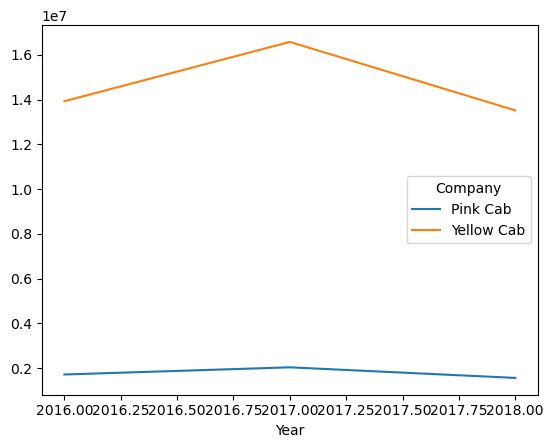

In [12]:
profit_plot_df = data[['Company', 'Year', 'Profit']].pivot_table(index='Year', columns='Company', values='Profit', aggfunc=sum)

profit_plot_df.plot()

In [39]:
users_plot_df = data[['Company', 'Year', 'Transaction ID']].pivot_table(index='Year', columns='Company', values='Transaction ID', aggfunc=pd.Series.nunique)
users_plot_df

Company,Pink Cab,Yellow Cab
Year,,
2016,25080,82239
2017,30321,98189
2018,29310,94253


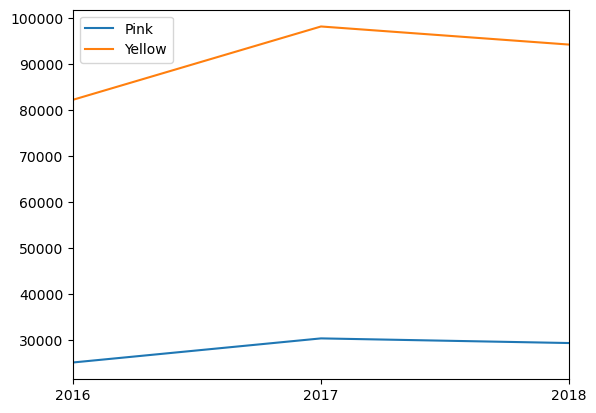

In [133]:
ax = plt.subplot(1, 1, 1)
ax.set_xlim(xmin=users_plot_df.index.min(), xmax=users_plot_df.index.max())
ax.set_xticks(list(range(users_plot_df.index.min(), users_plot_df.index.max()+1, 1)))
plt.plot(users_plot_df['Pink Cab'], label='Pink')
plt.plot(users_plot_df['Yellow Cab'], label='Yellow')
plt.legend()
plt.show()

The above plot shows that yellow cab has consistently had higher customers than pink cab for all years

In [75]:
top_cities = data.groupby('City').count()['Transaction ID'].sort_values(ascending=False).head(5).index
print(top_cities)
top_cities_users_df = data.groupby(['City', 'Company']).count()['Transaction ID'].to_frame(name='Transactions').reset_index()
top_cities_users_df = top_cities_users_df.loc[top_cities_users_df['City'].isin(top_cities), :].pivot(index='City', columns='Company', values='Transactions')
top_cities_users_df

Index(['New York', 'Chicago', 'Los Angeles', 'Washington', 'Boston'], dtype='string', name='City')


Company,Pink Cab,Yellow Cab
City,,
Boston,5186,24506
Chicago,9361,47264
Los Angeles,19865,28168
New York,13967,85918
Washington,3692,40045


<AxesSubplot:xlabel='City'>

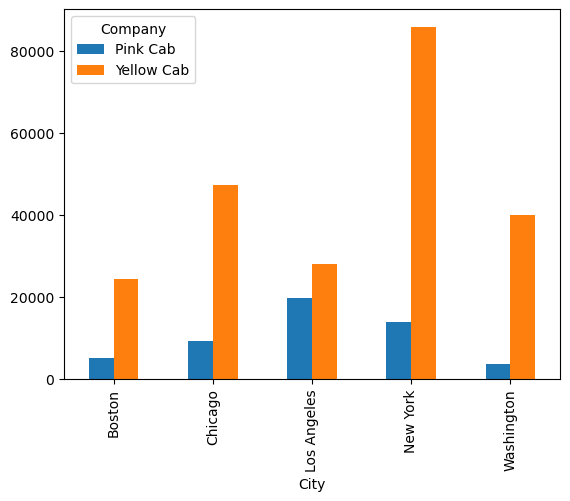

In [76]:
top_cities_users_df.plot(kind='bar')

In [111]:
profit_margin = data[['Year', 'Month', 'Company', 'Price Charged', 'Cost of Trip', 'Transaction ID']].groupby(['Year', 'Month', 'Company']).agg(func={'Price Charged': sum, 'Cost of Trip': sum, 'Transaction ID': pd.DataFrame.count})
profit_margin['Margin'] = (profit_margin['Price Charged'] - profit_margin['Cost of Trip']) / profit_margin['Price Charged']
profit_margin = profit_margin[['Transaction ID', 'Margin']].reset_index()
profit_margin.head()

,Year,Month,Company,Transaction ID,Margin
0,2016,1,Pink Cab,927,0.242280
1,2016,1,Yellow Cab,3719,0.428404
2,2016,2,Pink Cab,1050,0.253904
3,2016,2,Yellow Cab,4674,0.420798
4,2016,3,Pink Cab,1231,0.222343


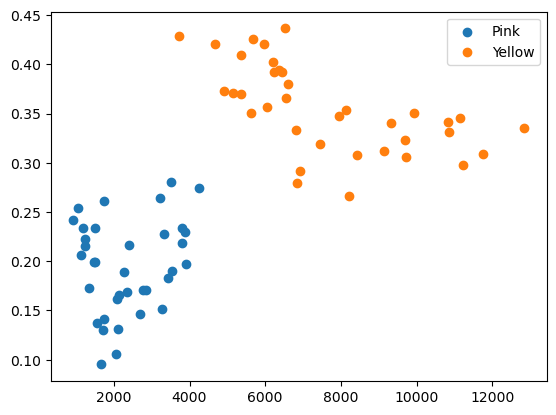

In [134]:
ax = plt.subplot(1,1,1)
plt.scatter(x=profit_margin.loc[profit_margin['Company']=='Pink Cab','Transaction ID'], 
            y=profit_margin.loc[profit_margin['Company']=='Pink Cab','Margin'], label='Pink')
plt.scatter(x=profit_margin.loc[profit_margin['Company']=='Yellow Cab','Transaction ID'], 
            y=profit_margin.loc[profit_margin['Company']=='Yellow Cab','Margin'], label='Yellow')
plt.legend()
plt.show()

In [126]:
monthly_users = profit_margin[['Year', 'Month', 'Company', 'Transaction ID']].pivot(index=['Year', 'Month'], columns='Company', values='Transaction ID')
monthly_users.reset_index(inplace=True)
monthly_users.head()

Company,Year,Month,Pink Cab,Yellow Cab
0,2016,1,927,3719
1,2016,2,1050,4674
2,2016,3,1231,5146
3,2016,4,1240,5360
4,2016,5,1567,5967


It is clear from the profit and users that Yellow Cab is the better company to invest in and I would refrain from performing
any further analysis.